In [1]:
%matplotlib inline

import astropy.units as u
import numpy as np

from sunpy.coordinates import frames
from sunpy.sun import constants
import sunpy.map

def helio_plot(sat0, sat1):
    '''
    Creates a polar plot with the sun in the center and the position of two planets of satelites
    
    sat0, sat1: SkyCoords
    '''  
    ax = plt.subplot(111, projection='polar')
    ax.plot([sat0.lon.to(u.rad).value], [sat0.radius.value], 'o')
    ax.plot([sat1.lon.to(u.rad).value], [sat1.radius.value], 'o')
    ax.plot([0], [1], 'o', c='blue')
    ax.plot([0], [0], '*', c='yellow')
    ax.set_theta_zero_location("S")

    plt.show()
    
    
def sun_seen_from(position, name, date):
    
    # Find out the size of the sun
    solar_r = (constants.radius / position.radius).to(u.arcsec, equivalencies=u.dimensionless_angles())
    th = np.linspace(0 * u.deg, 360 * u.deg)

    # Create a FD map from there
    half_image = 100
    datax, datay = np.mgrid[-half_image:half_image, -half_image:half_image]
    data = 1 - np.sqrt(datax**2 + datay**2)
    coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=date, observer=position, frame=frames.Helioprojective)
    size = solar_r / half_image / u.pixel
    header = sunpy.map.header_helper.make_fitswcs_header(data, coord,
                                                         reference_pixel=u.Quantity([half_image, half_image]*u.pixel),
                                                         scale=u.Quantity([size, size]),
                                                         instrument='sunlike', detector=f'Sun seen from {name}')

    return sunpy.map.Map(data, header)


def get_corners(center, fov, closed=True):
    '''
    Returns the corners of a square observation.
    '''
    half_width = fov['width']/2
    half_height = fov['height']/2
    square = [[center['x'] - half_width, center['y'] - half_height],
              [center['x'] + half_width, center['y'] - half_height],
              [center['x'] + half_width, center['y'] + half_height],
              [center['x'] - half_width, center['y'] + half_height]]
    
    if closed:
        square += [square[0]]
    
    return square



<center><h1>SolO Python</h1></center>

<br>
<center>
    <font size="56px"><b>How</b></font>
<table>
    <col width="230" align="left">
    <col width="130" align="center">
    <col width="230" align="right">
    <tr>
      <td style="vertical-align:bottom;"><img style="height: 70px;" src="media/sunpy_transparent.png"></td>
      <td style='text-align:center;'><font size="56px"><b>  and  </b></font></td>
      <td style='text-align:right;'><img style="height: 70px;" src="media/heliopy.png"></td>
    </tr>
</table>
<font size="56px"><b>can help your data analysis</b></font>
    </center>
    
    
<br>

<center>
    
#### David Pérez-Suárez & David Stansby

</center>

<center>
    <img style="height:500px;" src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" class="center">
</center>
    

## Let's start talking about Python.

*Who uses python already? Who has heard what's python?*

- Python is a Free Open Source Programming Language => available by default in most of your computers.
- It's normally referred as batteries included => It comes with a [standard library](https://docs.python.org/3/library/) that allows you to do many things (read many file formats, work with dates, work with paths for different OSs,...)
- PEPs - Python Enhancement Proposals - mechanisms to provide new ideas for the core language.

<center>
   <h1>Scientific (and astronomical) ecosystem</h1>
    
   <img style="height:600px;" src="./media/scipy-stack.png" class="center">
</center>


Packages with large community behind. Most of them installed by the default [anaconda](https://www.anaconda.com/distribution/).

<center>
   <h1>but there's more!</h1>
    
   <img style="height:600px;" src="media/OA-stack.png" class="center">
</center>

[Astropy's affiliated](https://www.astropy.org/affiliated/index.html) (42), [SunPy's](https://sunpy.org/team.html#affiliated-packages) 

[OpenAstronomy](https://openastronomy.org/) was created to unified the efforts for GSOC. However, now it's more than that. We also provide support to outreach and educational efforts.

All these packages are not just *open source* but *open developed*. That means that they are developed in the open, using good practice and keeping everyone informed.

Why many packages? is a way to keep maintainance and test maturity.

<center>
    <img src="media/sunpy_transparent.png">
</center>

<center>
    <h1>Version 1.0</h1>
</center>

## Download data

In [2]:
import astropy.units as u
from sunpy.net import Fido, attrs as a

attrs_time = a.Time('2019/03/14 00:10', '2019/03/14 00:11:30')
result = Fido.search(attrs_time, a.Instrument('aia'), a.Wavelength(193*u.AA))

result

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2019-03-14 00:10:04,2019-03-14 00:10:05,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:16,2019-03-14 00:10:17,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:28,2019-03-14 00:10:29,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:40,2019-03-14 00:10:41,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:52,2019-03-14 00:10:53,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:11:04,2019-03-14 00:11:05,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:11:16,2019-03-14 00:11:17,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:11:28,2019-03-14 00:11:29,SDO,AIA,FULLDISK,193.0 .. 193.0


In [3]:
files_downloaded = Fido.fetch(result)

## Visualise data

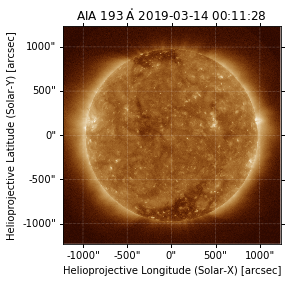

In [4]:
import sunpy.map

aia_map = sunpy.map.Map(files_downloaded[0])
aia_map.plot()



## Coordinates

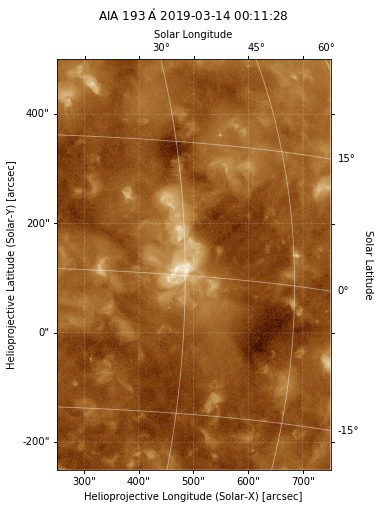

In [5]:
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord

top_right = SkyCoord(750 * u.arcsec, 500 * u.arcsec, frame=aia_map.coordinate_frame)
bottom_left = SkyCoord(250 * u.arcsec, -250 * u.arcsec, frame=aia_map.coordinate_frame)
aia_submap = aia_map.submap(bottom_left, top_right)

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection=aia_submap)
aia_submap.plot()
aia_submap.draw_limb()
aia_submap.draw_grid()
fig.tight_layout()
plt.show()

## More coordinates

INFO: Obtained JPL HORIZONS location for Solar Dynamics Observatory (spac [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Venus Barycenter (2) [sunpy.coordinates.ephemeris]


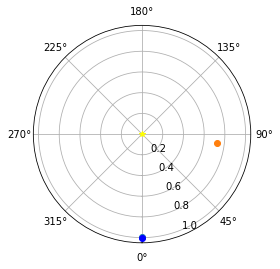

In [6]:
from sunpy.coordinates import get_horizons_coord

sdo_pos = get_horizons_coord('SDO', aia_map.date)
venus_pos = get_horizons_coord('Venus barycenter', aia_map.date)

helio_plot(sdo_pos, venus_pos)

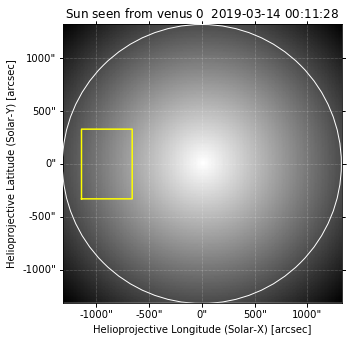

In [8]:
from sunpy.coordinates import frames

#Create an observer looking to the (-900,0) of the sun
spice_pointing = {'x': -900 * u.arcsec, 
                  'y': 0 * u.arcsec}
spice_FOV = {'width': 8 * u.arcmin, 
             'height': 11 * u.arcmin} # (480 slits)
spice_corners = get_corners(spice_pointing, spice_FOV)

spice_obs = SkyCoord(spice_corners,
                     observer=venus_pos,
                     frame=frames.Helioprojective)

venus_test_map = sun_seen_from(venus_pos, 'venus', date=aia_map.date)

# Displaying where we are pointing
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection=venus_test_map)
venus_test_map.plot()
venus_test_map.draw_limb()
ax.plot_coord(spice_obs, c='yellow')
plt.show()

Let's display where's these coordinates are on AIA

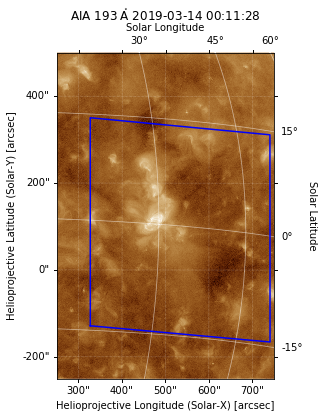

In [9]:
# Transform the coordinates from "SPICE" to AIA

spice_aia_view = spice_obs.transform_to(aia_map.coordinate_frame)

# And display
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection=aia_submap)
aia_submap.plot()
aia_submap.draw_grid()
ax.plot_coord(spice_aia_view, c='blue')
plt.show()

<center>
    <img src="media/heliopy.png">
</center>